# Model comparison with World Ocean Atlas Observations and Seawifs and Modis satelite data

In [1]:
%matplotlib inline
import warnings
warnings.simplefilter("ignore") # Silence warnings
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import hvplot.xarray
import xarray as xr
import cartopy
import cartopy.crs as ccrs
import numpy as np
from matplotlib.pyplot import figure
import pylab 
from cartopy.util import add_cyclic_point
import operator

# Scientific libraries
from numpy import arange,array,ones
from scipy import stats

import scipy.io as sio
import pandas as pd
import matplotlib.cm as cm

## Import dataset
this dataset is from 20-year climatologies from the first two cycles of the CORE2 interannual forcing. These are spesifically the files from 0105-0124 time period. This represents the 20-year mean from 1990-2009.

I used these 12 individual files for each month, and concatinated them into a single file, and then I using ncatted and cdo regridded to change the lats and lons to 180 by 360. 

In [2]:
ds = xr.open_dataset('/glade/work/gabyn/MARBL_spectra/remapgrid.out1.nc')

## SST comparison 

### we only have "ds.TEMP" which is potential temperature, which means that the potential temperature referenced to the surface will be slightly less than the in situ temperature since the expansion due to reduction in pressure leads to cooling.

In [3]:
temp_surf_avg_model = np.nanmean(ds.TEMP[:,0,:,:],axis =0)
no3_surf_avg_model  = np.nanmean(ds.NO3[:,0,:,:], axis = 0)
po4_surf_avg_model  = np.nanmean(ds.PO4[:,0,:,:], axis =0)

Text(0.5, 1.0, '$^oC$')

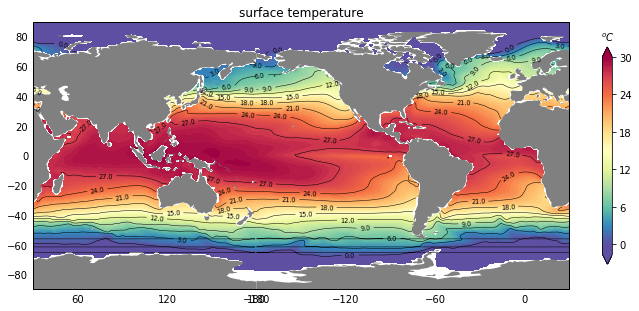

In [4]:
fig = plt.figure(figsize=(12, 8))
lat = ds.lat

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=210.0))
phyto, lon = add_cyclic_point(temp_surf_avg_model[:,:], coord=ds.lon, axis=1)
cf = ax.contourf(lon, lat, phyto, cmap='Spectral_r',transform=ccrs.PlateCarree(), 
                 levels =100, vmax = 30, vmin =0, extend='both')

cs = ax.contour(lon, lat, phyto, colors='k', levels=10, linewidths=0.5, transform=ccrs.PlateCarree())

lb = plt.clabel(cs, fontsize=6.5, inline=True, fmt='%r',inline_spacing=5);

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlines = False
gl.ylines = False
land = ax.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax.set_title('surface temperature')
cbar = plt.colorbar(cf, shrink=0.5, ticks =[0,6,12,18,24,30])
cbar.ax.set_title('$^oC$', fontsize = 10)

#fig.savefig('temperature_surface.png', dpi=300, bbox_inches='tight')

<img src="WOA_surface_temp_annual.png" alt="Drawing" style="width: 600px;"/>

## Nitrate

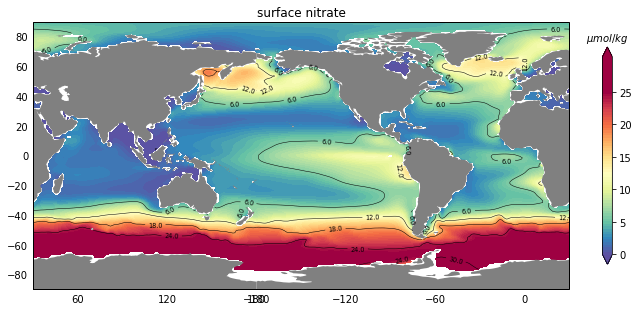

In [5]:
fig = plt.figure(figsize=(12, 8))
lat = ds.lat

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=210.0))
phyto, lon = add_cyclic_point(no3_surf_avg_model, coord=ds.lon, axis=1)
cn = ax.contourf(lon, lat, phyto, cmap='Spectral_r',transform=ccrs.PlateCarree(), 
                 levels =100, vmax = 25, vmin =0, extend='both')

cs = ax.contour(lon, lat, phyto, colors='k', levels=5, linewidths=0.5, transform=ccrs.PlateCarree())

lb = plt.clabel(cs, fontsize=6.5, inline=True, fmt='%r',inline_spacing=5);

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlines = False
gl.ylines = False
land = ax.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax.set_title('surface nitrate')
cbar = plt.colorbar(cn, shrink=0.5, ticks =[0,5,10,15,20,25])
cbar.ax.set_title('$\mu mol/kg$', fontsize = 10)

fig.savefig('NO3_surface.png', dpi=300, bbox_inches='tight')

<img src="NO3_annual_surface.png" alt="Drawing" style="width: 600px;"/>

## Phosphate 

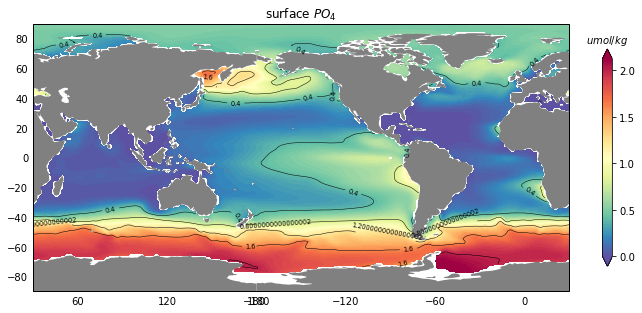

In [6]:
fig = plt.figure(figsize=(12, 8))
lat = ds.lat

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=210.0))
phyto, lon = add_cyclic_point(po4_surf_avg_model, coord=ds.lon, axis=1)
cf = ax.contourf(lon, lat, phyto, cmap='Spectral_r',transform=ccrs.PlateCarree(), 
                 levels =100, extend='both')

cs = ax.contour(lon, lat, phyto, colors='k', levels=6, linewidths=0.5, transform=ccrs.PlateCarree())

lb = plt.clabel(cs, fontsize=6.5, inline=True, fmt='%r',inline_spacing=5);

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlines = False
gl.ylines = False
land = ax.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax.set_title('surface $PO_4$')
cbar = plt.colorbar(cf, shrink=0.5, ticks = [0,0.5,1.0,1.5,2.0,2.5],extend='both')
cbar.ax.set_title('$umol/kg$', fontsize = 10)

fig.savefig('PO4_surface.png', dpi=300, bbox_inches='tight')

<img src="PO4_annual_surface.png" alt="Drawing" style="width: 600px;"/>

In [7]:
sio.savemat('model_SST&nutrients.mat',{'temp_surf_avg_model':temp_surf_avg_model,
                          'no3_surf_avg_model':no3_surf_avg_model,
                          'po4_surf_avg_model':po4_surf_avg_model,
                          'lon':ds.lon,
                          'lat':ds.lat})